In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

cols = ['user', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k//u.data', sep='\t', names=cols)

In [144]:
df.head()
df.shape

(100000, 4)

In [145]:
df.sort_values(by=['rating'], ascending=False)

,user,movie_id,rating,timestamp
28336,64,183,5,889737914
16000,213,121,5,878870940
28426,286,707,5,877531975
38655,94,518,5,891720950
16022,108,10,5,879879834
...,...,...,...,...
27329,13,401,1,882141841
27316,405,788,1,885548275
27307,279,1266,1,875308843
85465,68,926,1,876974298


In [146]:
movie = pd.read_csv('ml-100k//u.item', sep='\|', encoding="ISO-8859-1", header=None)

In [147]:
movie = movie[[0, 1]]

In [148]:
data = pd.merge(df, movie, left_on='movie_id', right_on=0)
data

,user,movie_id,rating,timestamp,0,1
0,196,242,3,881250949,242,Kolya (1996)
1,63,242,3,875747190,242,Kolya (1996)
2,226,242,5,883888671,242,Kolya (1996)
3,154,242,3,879138235,242,Kolya (1996)
4,306,242,5,876503793,242,Kolya (1996)
...,...,...,...,...,...,...
99995,840,1674,4,891211682,1674,Mamma Roma (1962)
99996,655,1640,3,888474646,1640,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,1637,Girls Town (1996)
99998,655,1630,3,887428735,1630,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [149]:
data.columns = ['user_id', 'movie_id', 'rating', 'timestamp', 'movie_id2', 'title']
data

,user_id,movie_id,rating,timestamp,movie_id2,title
0,196,242,3,881250949,242,Kolya (1996)
1,63,242,3,875747190,242,Kolya (1996)
2,226,242,5,883888671,242,Kolya (1996)
3,154,242,3,879138235,242,Kolya (1996)
4,306,242,5,876503793,242,Kolya (1996)
...,...,...,...,...,...,...
99995,840,1674,4,891211682,1674,Mamma Roma (1962)
99996,655,1640,3,888474646,1640,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,1637,Girls Town (1996)
99998,655,1630,3,887428735,1630,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [150]:
data.drop(columns=['timestamp', 'movie_id2'], inplace=True)
data

,user_id,movie_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)
...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [151]:
data

,user_id,movie_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)
...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [152]:
ratings = pd.DataFrame(data.groupby('title').mean()['rating'])
ratings['no of ratings'] = pd.DataFrame(data.groupby('title').count()['rating'])
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


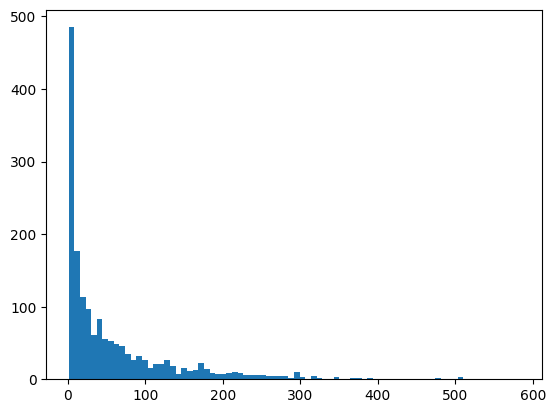

In [153]:
plt.hist(ratings['no of ratings'], bins=80)
plt.show()

(array([ 69.,   0.,   0.,   1.,   0.,   2.,   4.,   0.,   1.,   0.,  11.,
          1.,   4.,   7.,   3.,   3.,   9.,   6.,   5.,   2.,  53.,   2.,
         10.,  16.,  15.,  22.,  21.,  14.,  28.,  13.,  48.,  17.,  26.,
         37.,  26.,  37.,  44.,  28.,  24.,  11., 123.,  31.,  45.,  44.,
         50.,  43.,  44.,  37.,  38.,  43.,  48.,  38.,  42.,  48.,  30.,
         46.,  36.,  30.,  36.,  19.,  66.,  13.,  26.,  14.,   9.,  17.,
          4.,   3.,   2.,   4.,   4.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,  10.]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05,
        2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 ,
        2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15,
        3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 ,
        3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25,
        4.

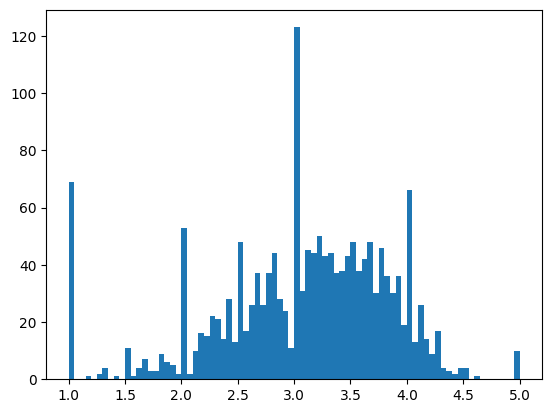

In [154]:
plt.hist(ratings['rating'], bins=80)

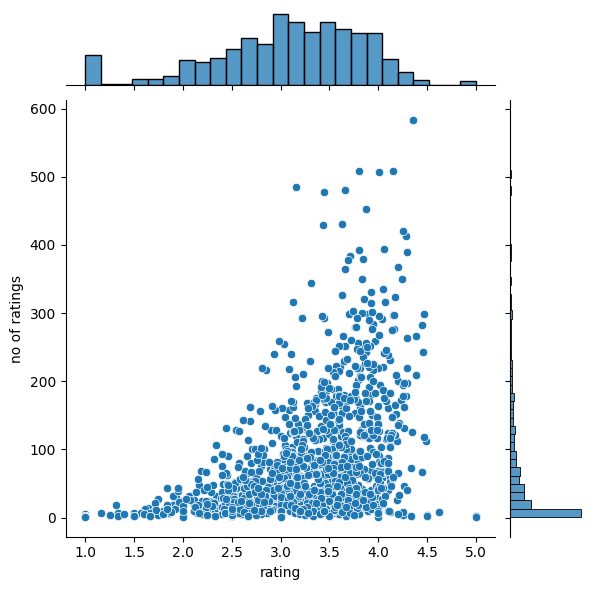

In [155]:
sns.jointplot(x=ratings['rating'], y=ratings['no of ratings'], data=data)

In [156]:
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [157]:
movie_matrix = data.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
movie = 'Star Wars (1977)'
movie_user_ratings = movie_matrix[movie]
movie_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [159]:
movie

'Star Wars (1977)'

In [160]:
similar_movies = movie_matrix.corrwith(movie_user_ratings)
similar_movies

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [161]:
corrMovies = pd.DataFrame(similar_movies, columns=['Correlation'])
corrMovies

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [162]:
corrMovies.dropna(inplace=True)

In [163]:
corrMovies

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [164]:
corrMovies.sort_values(by='Correlation', ascending=False, inplace=True)
corrMovies

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [165]:
corrMovies = corrMovies.join(ratings['no of ratings'])
corrMovies

,Correlation,no of ratings
title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
...,...,...
Roseanna's Grave (For Roseanna) (1997),-1.0,5
For Ever Mozart (1996),-1.0,3
American Dream (1990),-1.0,2


In [173]:
predictedMovies = corrMovies[corrMovies['no of ratings'] > 100]
predictedMovies.sort_values(by='Correlation', ascending=False)
predictedMovies.head(10)

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [174]:
def perdictedMovie(movieName):
    movie_user_ratings = movie_matrix[movie]
    similarMovies = movie_matrix.corrwith(movie_user_ratings)
    moviesCorr = pd.DataFrame(similarMovies, columns=['Correlation'])
    moviesCorr = moviesCorr.join(ratings['no of ratings'])
    predictedMovies = moviesCorr[moviesCorr['no of ratings'] > 100].sort_values(by='Correlation', ascending=False)
    return predictedMovies.head(10)

In [175]:
perdictedMovie(movie)

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
